In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

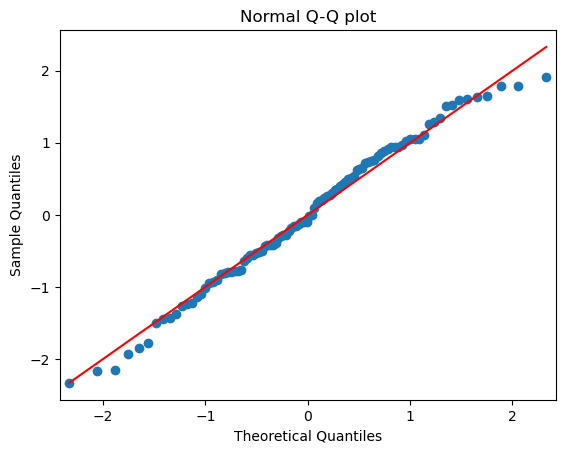

In [2]:
n=100
np.random.seed(26082021)

a=np.random.normal(2,5,size=n)
sm.qqplot(a,fit=True, line='s')
plt.title('Normal Q-Q plot')
plt.show()

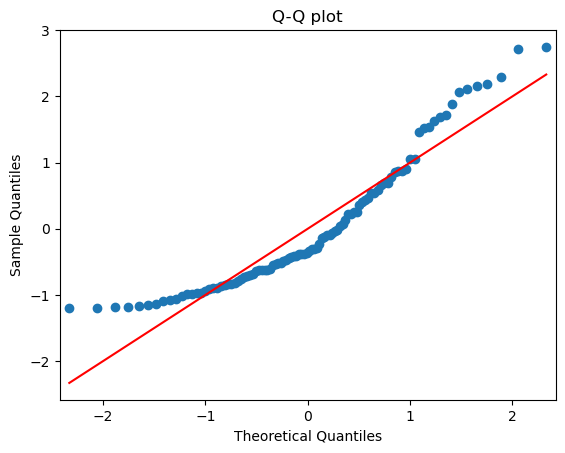

In [4]:
n=100
np.random.seed(26082021)

b=np.random.chisquare(df=3,size=n)
sm.qqplot(b, fit=True, line='s')
plt.title('Q-Q plot')
plt.show()

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])

In [6]:
df_v=df[df['species']=='Iris-virginica']

Difference randn and normal: 

https://stackoverflow.com/questions/21738383/python-difference-between-randn-and-normal

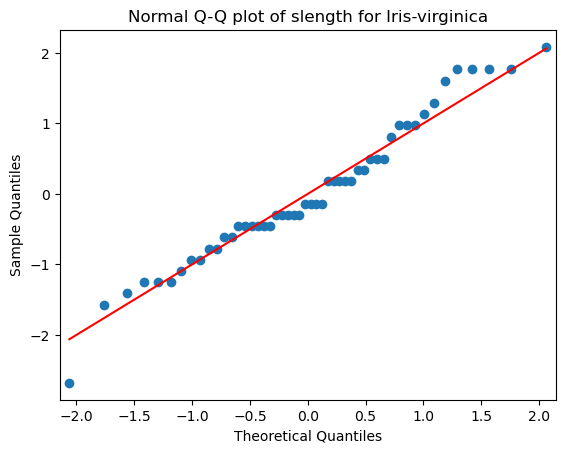

In [9]:
sm.qqplot(df_v['slength'],fit=True, line='s')
plt.title('Normal Q-Q plot of slength for Iris-virginica')
plt.show()

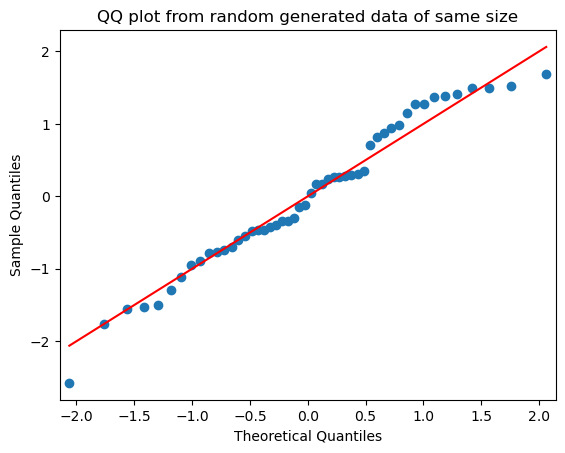

In [15]:
n=100
a=np.random.normal(df_v['slength'].mean(numeric_only=True), df_v['slength'].std(numeric_only=True), size=len(df_v['slength']))
sm.qqplot(a,fit=True, line='s')
plt.title('QQ plot from random generated data of same size')
plt.show()

#### D'agostino-Pearson test

In [27]:
def Dag_Per_test(alpha,data):
    k2, p=stats.normaltest(data)
    print('Alpha is ', alpha)
    print('p-value is', p)
    
    if p<alpha:
        print('the null hypothesis can be rejected, data is not normally distributed')
    else:
        print('the null hypothesis cannot be rejected, distribution is normal')

In [29]:
Dag_Per_test(alpha=0.001, data=a)

Alpha is  0.001
p-value is 0.6515049675810702
the null hypothesis cannot be rejected, distribution is normal


In [28]:
Dag_Per_test(alpha=0.001, data=b)

Alpha is  0.001
p-value is 0.0008658946948332712
the null hypothesis can be rejected, data is not normally distributed


In [30]:
data=df_v['slength']
Dag_Per_test(alpha=0.001, data=data)

Alpha is  0.001
p-value is 0.9008201941206306
the null hypothesis cannot be rejected, distribution is normal


D'agostino Pearson test confirmed our conclusion with the QQ plot

In [32]:
df_s=df[df['species']=='Iris-setosa']
data=df_s['swidth']
Dag_Per_test(alpha=0.001, data=data)

Alpha is  0.001
p-value is 0.388916654112468
the null hypothesis cannot be rejected, distribution is normal


In [34]:
def Shap_test(alpha, data):
    s,p=stats.shapiro(data)
    print('Alpha is ', alpha)
    print('p-value is', p)
    
    if p<alpha:
        print('the null hypothesis can be rejected, data is not normally distributed')
    else:
        print('the null hypothesis cannot be rejected, hypothesis that data is normally distributed cannot be rejected')

In [37]:
df_s=df[df['species']=='Iris-setosa']
data=df_s['swidth']
Shap_test(alpha=0.001, data=data)

Alpha is  0.001
p-value is 0.20464898645877838
the null hypothesis cannot be rejected, hypothesis that data is normally distributed cannot be rejected


### T-test

answer the question: If the data were sampled from a Gaussian population with a mean equal to the hypothetical value you entered, what is the chance of randomly selecting N data points and finding a mean as far (or further) from the hypothetical value as observed here?

In [38]:
mean=df_s['swidth'].mean(numeric_only=True)
print('The mean is', mean)

The mean is 3.418


In [41]:
stats.ttest_1samp(data, popmean=3.3, alternative='two-sided')

TtestResult(statistic=2.1898492754769694, pvalue=0.033325644557196644, df=49)

Our null hypothesis was that there is a probability to sample data (normally distributed) about Iris-setosa sepal lenght where the mean of the samples would be 3.3

As we rejected the null hypothesis (we have 3.3% of probability to sample data with mean 3.3 or worse), we can say that is is not likely to sample data by measuring sepal width of Iris-setosa that are normally distributed and where the mean of the data is 3.3

### Wilcoxon signed rank

for samples where normality is not satisfied but distribution can be assumed simmetric

In [51]:
stats.wilcoxon(data-3.3, alternative='two-sided')

WilcoxonResult(statistic=352.0, pvalue=0.01533078537135795)

Null hypothesis: F is symmetric about μ = 0 
pvalue is <> than 0.5 therefore (for two-sided alternative) hypothesis H3, F is symmetric about μ ≠ 0

In [52]:
import statsmodels.stats.descriptivestats as dstat

In [55]:
dstat.sign_test(data, mu0=3.3)

(6.0, 0.11140289106101878)

## Two samples tests

In [56]:
swid_s=df_s['swidth']
swid_v=df_v['swidth']

In [57]:
Dag_Per_test(alpha=0.001, data=swid_v)

Alpha is  0.001
p-value is 0.2770869880114645
the null hypothesis cannot be rejected, distribution is normal


In [59]:
stats.ttest_ind(swid_s, swid_v, equal_var=False, alternative='two-sided')

TtestResult(statistic=6.289384996672061, pvalue=9.58603917037916e-09, df=95.3952528353165)

p < alpha, the null hypothesis can be rejected, it is not likely that these two samples comes from a population with the same mean

In [61]:
mean_s=swid_s.mean(numeric_only=True)
mean_v=swid_v.mean(numeric_only=True)

print('Mean for Iris-setosa sepal width is:', mean_s, '\n', 'Mean for Iris-virginica sepal width is:', mean_v )

Mean for Iris-setosa sepal width is: 3.418 
 Mean for Iris-virginica sepal width is: 2.974


we can check if the two samples have similar variance:

In [65]:
Dag_Per_test(alpha=0.05, data=swid_s)
Dag_Per_test(alpha=0.05, data=swid_v)

var_s=swid_s.var(numeric_only=True)
var_v=swid_v.var(numeric_only=True)

print('Variance for Iris-setosa sepal width is: %.2f'%var_s, '\n', 'Variance for Iris-virginica sepal width is: %.2f'%var_v )

Alpha is  0.05
p-value is 0.388916654112468
the null hypothesis cannot be rejected, distribution is normal
Alpha is  0.05
p-value is 0.2770869880114645
the null hypothesis cannot be rejected, distribution is normal
Variance for Iris-setosa sepal width is: 0.15 
 Variance for Iris-virginica sepal width is: 0.10


We can therefore apply a paired t-test

In [66]:
stats.ttest_ind(swid_s, swid_v, equal_var=True, alternative='two-sided')

TtestResult(statistic=6.289384996672061, pvalue=8.916634067006443e-09, df=98.0)

p < alpha, null hypothesis is rejected, it is not likely that swid_s and swid_v comes from a population with similar mean, it is therefore likely to distinguish Iris setosa and Iris virginica by their sepal width

#### Mann-Whitney U for not normally distributed unpaired data

In [67]:
stats.mannwhitneyu(swid_s, swid_v, alternative='two-sided')

MannwhitneyuResult(statistic=2073.5, pvalue=1.1808768215413658e-08)

In [69]:
print(stats.mannwhitneyu(swid_s[:25], swid_s[25:50], alternative='two-sided'))
print(stats.mannwhitneyu(swid_s[:10], swid_s[40:50], alternative='two-sided'))
print(stats.mannwhitneyu(swid_s[:5], swid_s[45:50], alternative='two-sided'))

MannwhitneyuResult(statistic=365.0, pvalue=0.3101127889935418)
MannwhitneyuResult(statistic=42.5, pvalue=0.595035151629138)
MannwhitneyuResult(statistic=9.0, pvalue=0.5283593272709488)


p value > alpha the null hypothesis cannot be rejected, it is likely that the two samples comes from a population with the same mean
    

#### Kolmogorov-Smirnov statistic on 2 samples

This is a test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution

In [70]:
stats.ks_2samp(swid_s, swid_v)

KstestResult(statistic=0.5, pvalue=4.8075337049514946e-06, statistic_location=3.0, statistic_sign=-1)

p < alpha, the null hypothesis is rejected, it is not very likely that the two samples are drawn from the same continuous distribution

In [72]:
print(stats.ks_2samp(swid_s[:25], swid_s[25:50]))
print(stats.ks_2samp(swid_s[:10], swid_s[40:50]))

KstestResult(statistic=0.2, pvalue=0.7102038997076623, statistic_location=3.5, statistic_sign=-1)
KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=3.6, statistic_sign=1)


p > alpha, the null hypothesis cannot be rejected, it is likely that the two samples are drawn from the same continuous distribution

#### t-test for normally distributed paired data

This is a test for the null hypothesis that 2 related or repeated samples have identical average (expected) values

In [73]:
slen_s=df_s['slength']

In [74]:
stats.ttest_rel(swid_s, slen_s, alternative='two-sided')

TtestResult(statistic=-42.79945567495111, pvalue=1.7724677938534726e-40, df=49)

p < alpha, the null hypothesis is rejected, it is not likely that the two samples have identical average (expected) values

In [75]:
df_s.head(5)

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
stats.ttest_rel(df_s.iloc[0:25,1:2], df_s.iloc[25:50, 1:2], alternative='two-sided')

TtestResult(statistic=array([1.08300729]), pvalue=array([0.2895664]), df=array([24]))

p > alpha, the null hypothesis cannot be rejected, it is likely that the two samples have identical average (expected) value

#### Wilcoxon signed-rank test for not normally distributed paired data

assess whether their population mean ranks differ

In [78]:
stats.wilcoxon(swid_s, slen_s, alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=1.7763568394002505e-15)

p < alpha, the null hypothesis can be rejected, it is not likely that the population mean ranks of the two samples differ

#### ANOVA tests (analysis of variance)

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean (a generalisation of the t-test to more than two samples)

In [79]:
f, p= stats.f_oneway(swid_s[:10], swid_s[10:20], swid_s[20:30])
p

0.07117940263843624

p > alpha, the null hypothesis cannot be rejected, it is likely that the three samples have the same population mean. 

In [82]:
df_ve=df[df['species']=='Iris-versicolor']
swid_ve=df_ve['swidth']
f, p=stats.f_oneway(swid_s, swid_v)
p

8.916634067006418e-09

p < alpha, the null hypothesis can be rejected, it is not likely that the three samples have the same population mean